In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

inputs_features = "/content/gdrive/My Drive/Hack/features_x.csv"
outputs_features = "/content/gdrive/My Drive/Hack/features_y.csv"
train_labels = "/train_label.csv"
features_x = pickle.load( open( inputs_features, "rb" ) )
features_y = pickle.load( open( outputs_features, "rb" ) )

In [5]:
"""import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
#train_path = '/content/gdrive/Hack_datasets/Train/'
#file_path =  '/content/gdrive/Hack_datasets/train_label.csv'
#train_path = 'gdrive/My Drive/Colab Notebooks/Hack_datasets/Train/'
# file_path  = 'gdrive/My Drive/Colab Notebooks/Hack_datasets/train_label.csv'
#data = pd.read_csv(file_path)
#data.head()
inputs_features = "/features_x.csv"
outputs_features = "/features_y.csv"
train_labels = "/train_label.csv"
features_x = pickle.load( open( inputs_features, "rb" ) )
features_y = pickle.load( open( outputs_features, "rb" ) )"""


'import pandas as pd\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport pickle\n#train_path = \'/content/gdrive/Hack_datasets/Train/\'\n#file_path =  \'/content/gdrive/Hack_datasets/train_label.csv\'\n#train_path = \'gdrive/My Drive/Colab Notebooks/Hack_datasets/Train/\'\n# file_path  = \'gdrive/My Drive/Colab Notebooks/Hack_datasets/train_label.csv\'\n#data = pd.read_csv(file_path)\n#data.head()\ninputs_features = "/features_x.csv"\noutputs_features = "/features_y.csv"\ntrain_labels = "/train_label.csv"\nfeatures_x = pickle.load( open( inputs_features, "rb" ) )\nfeatures_y = pickle.load( open( outputs_features, "rb" ) )'

In [0]:
train_x = features_x
train_y = features_y

In [0]:
Y = [line.strip() for line in train_y]

In [0]:
train_Y = Y
train_X = train_x

In [0]:
import numpy as np

In [0]:
X = np.array(train_X)
Y = np.array(train_Y)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2, shuffle=True)


In [12]:
print(X_train.shape)
print(X_test.shape) 
print(y_train.shape)
print(y_test.shape)

(4183, 180)
(1046, 180)
(4183,)
(1046,)


In [13]:
import tensorflow as tf


## Keras
import keras
from keras import regularizers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from keras.callbacks import  History, ReduceLROnPlateau, CSVLogger
from keras.models import Model, Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import np_utils
from keras.utils import to_categorical
from keras import backend as K

## Sklearn
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
## Rest
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
from tqdm import tqdm
from keras.utils import to_categorical

Using TensorFlow backend.


In [0]:
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [0]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [17]:
x_traincnn.shape, x_testcnn.shape

((4183, 180, 1), (1046, 180, 1))

In [0]:
# Set up Keras util functions

from keras import backend as K

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def fscore(y_true, y_pred):
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    f_score = 2 * (p * r) / (p + r + K.epsilon())
    return f_score

def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer.lr
    return lr

In [19]:
# New model
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
# Edit according to target class no.
model.add(Dense(6))
model.add(Activation('softmax'))
optimizer=keras.optimizers.Adadelta()
opt = keras.optimizers.SGD(lr=0.001, momentum=0.0, decay=0.0, nesterov=False)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [20]:
# Plotting Model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 180, 256)          2304      
_________________________________________________________________
activation_1 (Activation)    (None, 180, 256)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 180, 256)          524544    
_________________________________________________________________
batch_normalization_1 (Batch (None, 180, 256)          1024      
_________________________________________________________________
activation_2 (Activation)    (None, 180, 256)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 180, 256)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 22, 256)          

In [21]:
# Compile your model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy', fscore])

In [0]:
batch_size = 60
epochs = 700

In [19]:
# Model Training
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.000001)
# Please change the model name accordingly.
mcp_save = ModelCheckpoint('model/best.h5', save_best_only=True, monitor='val_loss', mode='min')

history=model.fit(x_traincnn, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  validation_data=(x_testcnn, y_test), 
                  callbacks=[lr_reduce])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 4183 samples, validate on 1046 samples
Epoch 1/700





4183/4183 [==============================] - 4s 999us/step - loss: 1.7952 - acc: 0.1972 - fscore: 0.0024 - val_loss: 1.7611 - val_acc: 0.2591 - val_fscore: 0.0000e+00
Epoch 2/700
4183/4183 [==============================] - 1s 206us/step - loss: 1.7508 - acc: 0.2441 - fscore: 0.0202 - val_loss: 1.7372 - val_acc: 0.2811 - val_fscore: 0.0093
Epoch 3/700
4183/4183 [==============================] - 1s 208us/step - loss: 1.7242 - acc: 0.2639 - fscore: 0.0294 - val_loss: 1.7214 - val_acc: 0.2859 - val_fscore: 0.0167
Epoch 4/700
4183/4183 [==============================] - 1s 202us/step - loss: 1.7073 - acc: 0.2697 - fscore: 0.0438 - val_loss: 1.7084 - val_acc: 0.2887 - val_fscore: 0.0222
Epoch 5/700
4183/4183 [==============================] - 1s 202us/step - loss: 1.6913 - acc: 0.2685 - fscore: 0.0496 - val_loss: 1.6979 - val_acc:

In [0]:
# Plotting the Train Valid Loss Graph

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import pydot
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_squared_error, r2_score, explained_variance_score)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import Imputer

In [24]:
X_train, X_test, y_train, y_test

(array([[-2.63354671e+02,  8.32691159e+01,  2.20349784e+01, ...,
          3.91745179e-03,  3.58327225e-03,  3.69605848e-03],
        [-4.08925326e+02,  1.14393405e+02,  4.44335696e+01, ...,
          1.88218773e-05,  2.19543179e-05,  1.75022454e-05],
        [-3.79407032e+02,  9.30345783e+01,  4.77252285e+01, ...,
          3.95737395e-04,  1.78140088e-04,  1.25025767e-04],
        ...,
        [-2.87801068e+02,  9.73590400e+01,  1.56891171e+01, ...,
          8.54447792e-04,  6.29189220e-04,  4.89459235e-04],
        [-3.81316351e+02,  9.37484177e+01,  3.59881420e+01, ...,
          7.87528701e-05,  7.84652770e-05,  5.94389687e-05],
        [-3.77751838e+02,  9.56535803e+01,  4.82346848e+01, ...,
          4.04064459e-04,  2.83025351e-04,  4.52122033e-04]]),
 array([[-3.05513536e+02,  9.28985016e+01,  8.51695946e+00, ...,
          2.87468310e-03,  3.21735388e-03,  2.53659834e-03],
        [-3.53340546e+02,  1.18664835e+02,  3.55149404e+01, ...,
          2.52247158e-04,  3.54294057e

In [25]:
params_dict={'n_estimators':[500],'max_features':['auto','sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),param_grid=params_dict,scoring='accuracy',cv=10)
clf_rf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid=

In [0]:
# Predicting the traning set
rf_pred = clf_rf.predict(X_test)

In [28]:
# Calculate the absolute errors
errors = abs(rf_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.15 degrees.


In [29]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
print('Error:', mape)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Error: [[ nan  nan  nan 100.  nan  nan]
 [ nan  nan 100.  nan  nan  nan]
 [ nan 100.  nan  nan  nan  nan]
 ...
 [ nan  nan  nan   0.  nan  nan]
 [ nan 100.  nan  nan  nan  nan]
 [ nan  nan  nan 100.  nan  nan]]
Accuracy: nan %.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [0]:
svc = SVC()
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)
#Fitting the model
grid_svc.fit(X_train, y_train)

In [0]:
grid_svc.best_params_

In [0]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 3, gamma = 1.4, kernel= 'rbf')
svc2.fit(X_train, y_train)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
...     data_x,data_y , test_size=0.2, random_state=42)

In [0]:
print(X_train.shape)
print(X_test.shape) 
print(y_train.shape)
print(y_test.shape)

(4183, 1)
(1046, 1)
(4183,)
(1046,)


In [0]:
import numpy as np


In [0]:
train_x = np.array(features_x)
train_y = np.array(features_y)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
...     train_x, train_y , test_size=0.2, random_state=42)

In [0]:
print(X_train.shape)
print(X_test.shape) 
print(y_train.shape)
print(y_test.shape)

(4183, 180)
(1046, 180)
(4183,)
(1046,)


In [0]:
print(train_x.shape) , print(train_y.shape) 

(5229, 180)
(5229,)


(None, None)

In [0]:
import tensorflow as tf


## Keras
from keras import regularizers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from keras.callbacks import  History, ReduceLROnPlateau, CSVLogger
from keras.models import Model, Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import np_utils
from keras.utils import to_categorical


## Sklearn
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


## Rest
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
from tqdm import tqdm

In [0]:
x_traincnn = np.expand_dims(train_x, axis=2)

In [0]:
train_x.shape

(5229, 180)

In [0]:
x_traincnn.shape

(5229, 180, 1)

In [0]:
lb = LabelEncoder()

In [0]:
y_train = np_utils.to_categorical(lb.fit_transform(train_y))

In [0]:
from keras.utils import to_categorical

In [0]:
train = to_categorical(train_y)

In [0]:
train.shape

(5229, 6)

In [0]:
y_train.shape

(5229, 6)

In [0]:
# Set up Keras util functions

from keras import backend as K

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def fscore(y_true, y_pred):
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    f_score = 2 * (p * r) / (p + r + K.epsilon())
    return f_score

def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer.lr
    return lr

In [0]:
import keras

In [0]:
# New model
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(train_x.shape[1],1)))
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
# Edit according to target class no.
model.add(Dense(6))
model.add(Activation('softmax'))
opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)

In [0]:


# Plotting Model Summary

model.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_17 (Conv1D)           (None, 180, 256)          2304      
_________________________________________________________________
activation_19 (Activation)   (None, 180, 256)          0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 180, 256)          524544    
_________________________________________________________________
batch_normalization_5 (Batch (None, 180, 256)          1024      
_________________________________________________________________
activation_20 (Activation)   (None, 180, 256)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 180, 256)          0         
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 22, 256)          

In [0]:
# Compile your model

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [0]:
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.000001)
# Please change the model name accordingly.
mcp_save = ModelCheckpoint('model/aug_noiseNshift_2class2_np.h5', save_best_only=True, monitor='val_loss', mode='min')
cnnhistory=model.fit(x_traincnn, train, batch_size=32, epochs=700,
                      callbacks=[mcp_save, lr_reduce])

Epoch 1/700
5229/5229 [==============================] - 3s 566us/step - loss: 1.8377 - acc: 0.1733
Epoch 2/700
 160/5229 [..............................] - ETA: 2s - loss: 1.7968 - acc: 0.1625

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:707: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:1379: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_loss` which is not available. Available metrics are: loss,acc,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


5229/5229 [==============================] - 2s 387us/step - loss: 1.7662 - acc: 0.2012
Epoch 3/700
5229/5229 [==============================] - 2s 380us/step - loss: 1.7456 - acc: 0.2343
Epoch 4/700
5229/5229 [==============================] - 2s 374us/step - loss: 1.7281 - acc: 0.2559
Epoch 5/700
5229/5229 [==============================] - 2s 379us/step - loss: 1.7113 - acc: 0.2601
Epoch 6/700
5229/5229 [==============================] - 2s 381us/step - loss: 1.7008 - acc: 0.2718
Epoch 7/700
5229/5229 [==============================] - 2s 375us/step - loss: 1.6937 - acc: 0.2712
Epoch 8/700
5229/5229 [==============================] - 2s 373us/step - loss: 1.6844 - acc: 0.2800
Epoch 9/700
5229/5229 [==============================] - 2s 384us/step - loss: 1.6797 - acc: 0.2836
Epoch 10/700
5229/5229 [==============================] - 2s 374us/step - loss: 1.6726 - acc: 0.2893
Epoch 11/700
5229/5229 [==============================] - 2s 377us/step - loss: 1.6643 - acc: 0.2913
Epoch 12/7

KeyboardInterrupt: ignored

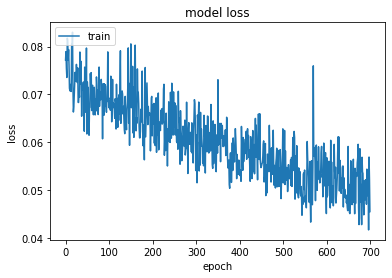

In [0]:
# Plotting the Train Valid Loss Graph

plt.plot(cnnhistory.history['loss'])
#plt.plot(cnnhistory.history[monitor['val_loss']])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
import soundfile # to read audio file
import numpy as np
import librosa # to extract speech features
import glob
import os
import pickle # to save model after training
from sklearn.model_selection import train_test_split # for splitting training and testing
from sklearn.neural_network import MLPClassifier # multi-layer perceptron model
from sklearn.metrics import accuracy_score # to measure how good we are

In [0]:
def extract_feature(file_name, **kwargs):
    """
    Extract feature from audio file `file_name`
        Features supported:
            - MFCC (mfcc)
            - Chroma (chroma)
            - MEL Spectrogram Frequency (mel)
            - Contrast (contrast)
            - Tonnetz (tonnetz)
        e.g:
        `features = extract_feature(path, mel=True, mfcc=True)`
    """
    mfcc = kwargs.get("mfcc")
    chroma = kwargs.get("chroma")
    mel = kwargs.get("mel")
    contrast = kwargs.get("contrast")
    tonnetz = kwargs.get("tonnetz")
    with soundfile.SoundFile(train_path+file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate = sound_file.samplerate
        if chroma or contrast:
            stft = np.abs(librosa.stft(X))
        result = np.array([])
        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result = np.hstack((result, mfccs))
        if chroma:
            chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result = np.hstack((result, chroma))
        if mel:
            mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result = np.hstack((result, mel))
        if contrast:
            contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
            result = np.hstack((result, contrast))
        if tonnetz:
            tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
            result = np.hstack((result, tonnetz))
    return result


def load_data():
  X, y = [], []
  ffile = open(file_path, "r")
  #lines = ffile.readlines()
  lines = ffile.readlines()[1:]
  ffile.close()
  #print(len(lines))
  #next(lines)
  for line in lines:
    lst_split = line.split(',')
    file_name = lst_split[0]
    emotion = lst_split[1]
    #if emotion not in AVAILABLE_EMOTIONS:
    #    continue
    # extract speech features
    #print(file_name)
    features = extract_feature(file_name, mfcc=True, chroma=True, mel=True)
    # add to data
    X.append(features)
    y.append(emotion)
    # split the data to training and testing and return it
  return X, y #train_test_split(np.array(X), y, test_size=test_size, random_state=7)


In [0]:
#X_train, X_test, y_train, y_test = load_data(test_size=0.25)
X_train, y_train = load_data()


5229


In [0]:
X_train_np = np.array(X_train)

In [0]:
X_train_np.shape

(5229, 180)

In [0]:
import pickle
with open('gdrive/My Drive/Colab Notebooks/Hack_datasets/features_x.csv', 'wb') as handle:
    pickle.dump(X_train, handle)

In [0]:
import pickle
with open('gdrive/My Drive/Colab Notebooks/Hack_datasets/features_y.csv', 'wb') as handle:
    pickle.dump(y_train, handle)

In [0]:
with open('gdrive/My Drive/Colab Notebooks/Hack_datasets/features_x.csv', 'rb') as handle:
    train_d = pickle.load(handle)

In [0]:
with open('gdrive/My Drive/Colab Notebooks/Hack_datasets/features_y.csv', 'rb') as handle:
    test_d = pickle.load(handle)

In [0]:
# print some details
# number of samples in training data
print("[+] Number of training samples:", X_train_np.shape[0])
# number of samples in testing data
#print("[+] Number of testing samples:", X_test.shape[0])
# number of features used
# this is a vector of features extracted 
# using extract_features() function
print("[+] Number of features:", X_train_np.shape[1])

[+] Number of training samples: 5229
[+] Number of features: 180


In [0]:
# best model, determined by a grid search
model_params = {
    'alpha': 0.01,
    'batch_size': 256,
    'epsilon': 1e-08, 
    'hidden_layer_sizes': (300,), 
    'learning_rate': 'adaptive', 
    'max_iter': 500, 
}

In [0]:
# initialize Multi Layer Perceptron classifier
# with best parameters ( so far )
model = MLPClassifier(**model_params)

In [0]:
# train the model
print("[*] Training the model...")
model.fit(X_train_np, y_train)

[*] Training the model...


MLPClassifier(activation='relu', alpha=0.01, batch_size=256, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(300,), learning_rate='adaptive',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
# predict 25% of data to measure how good we are
y_pred = model.predict(X_train_np)

# calculate the accuracy
accuracy = accuracy_score(y_true=y_train, y_pred=y_pred)

print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 72.73%


In [0]:
# now we save the model
# make result directory if doesn't exist yet
pickle.dump(model, open("gdrive/My Drive/Colab Notebooks/Hack_datasets/mlp_classifier.model", "wb"))

End
